In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
if not os.path.isdir('Properties_philly_Kraggle_v2.csv'):
  print(os.listdir("/content"))

['.config', 'Properties_philly_Kraggle_v2.csv', 'sample_data']


In [ ]:
# philly_properties = np.genfromtxt('Properties_philly_Kraggle_v2.csv', delimiter=',')

In [3]:
import pandas as pd
# df=pd.read_csv('Properties_philly_Kraggle_v2.csv', sep=',')
df=pd.read_csv('Properties_philly_Kraggle_v2.csv', sep=',', index_col=False)
df.dropna(inplace=True)
df.reset_index()
df.values

array([['2327 E SERGEANT ST ',
        '2327 E SERGEANT ST , Philadelphia, PA 19125',
        'September 13  2016', ..., '2', 'SingleFamily', '240,254.55'],
       ['4466 TOLBUT ST ', '4466 TOLBUT ST , Philadelphia, PA 19136',
        'August 2  2016', ..., '3', 'Townhouse', '150,937.50'],
       ['134 E WALNUT LN ', '134 E WALNUT LN , Philadelphia, PA 19144',
        'August 2  2016', ..., '3', 'SingleFamily', '225,483.33'],
       ...,
       ['653 N 33RD ST ', '653 N 33RD ST , Philadelphia, PA 19104',
        'August 2  2016', ..., '5', 'MultiFamily2To4', '21,166.67'],
       ['5423 WOODBINE AVE ',
        '5423 WOODBINE AVE , Philadelphia, PA 19131', 'August 2  2016',
        ..., '6', 'SingleFamily', '126,401.60'],
       ['730 S CECIL ST ', '730 S CECIL ST , Philadelphia, PA 19143',
        'August 2  2016', ..., '3', 'Townhouse', '38,900.00']],
      dtype=object)

In [4]:
df[-5:]
# TODO: Fix index after dropna

,Address,Zillow Address,Sale Date,Opening Bid,Sale Price/bid price,Book/Writ,OPA,Postal Code,Attorney,Ward,Seller,Buyer,Sheriff Cost,Advertising,Other,Record Deed,Water,PGW,Avg Walk&Transit score,Violent Crime Rate,School Score,Zillow Estimate,Rent Estimate,taxAssessment,yearBuilt,finished \n(SqFt),bathrooms,bedrooms,PropType,Average comps
610,2210 N 17TH ST,"2210 N 17TH ST , Philadelphia, PA 19132",September 13 2016,7400.0,"$59,000",1609-400,161161901.0,19132.0,SHAPIRO & DENARDO LLC,16.0,DEUTSCHE BANK NATIONAL TRUST COMPANY AS TRUST...,MORTGAGE INVESTMENTS LLC,3060.26,1723.23,0.0,257.0,1274.85,556.48,75.50,1.72,5.63,"61,406.00","1,250.00","13,400.00",1936.0,2288.0,1,5,Townhouse,"72,625.00"
611,31 N RUBY ST,"31 N RUBY ST , Philadelphia, PA 19139",October 4 2016,64800.0,"$64,800",1610-567,441192200.0,19139.0,MILSTEAD & ASSOCIATES LLC,44.0,FEDERAL NATIONAL MORTGAGE ASSOCIATION,MILSTEAD & ASSOCIATES LLC,2566.47,1784.02,0.0,257.0,53187.97,4930.07,80.08,1.54,3.34,"59,447.00","1,100.00","43,900.00",1925.0,1238.0,1,3,Townhouse,"56,029.00"
612,653 N 33RD ST,"653 N 33RD ST , Philadelphia, PA 19104",August 2 2016,15100.0,"$25,000",1602-655,242143100.0,19104.0,MCCABE WEISBERG & CONWAY P.C.,24.0,THE BANK OF NEW YORK MELLON FKA THE BANK OF NE...,THE BANK OF NEW YORK MELLON FKA THE BANK OF NE...,2040.69,1756.59,0.0,0.0,1823.79,379.75,81.79,0.65,28.40,"20,806.00","1,300.00","16,200.00",1935.0,2315.0,4,5,MultiFamily2To4,"21,166.67"
613,5423 WOODBINE AVE,"5423 WOODBINE AVE , Philadelphia, PA 19131",August 2 2016,15400.0,"$180,000",1608-406,522177800.0,19131.0,STERN & EISENBERG P.C.,52.0,THE BANK OF NEW YORK MELLON F/K/A THE BANK OF ...,STERN & EISENBERG P.C.,5736.40,1832.39,0.0,0.0,1937.32,7101.25,65.75,0.29,8.34,"83,447.00","1,450.00","65,700.00",1925.0,3096.0,2,6,SingleFamily,"126,401.60"
804,730 S CECIL ST,"730 S CECIL ST , Philadelphia, PA 19143",August 2 2016,8200.0,"$94,000",1607-504,463274800.0,19143.0,POWERS KIRN & ASSOCIATES LLC,46.0,U.S. BANK NATIONAL ASSOCIATION AS TRUSTEE LEH...,POWERS KIRN & ASSOCIATES LLC,3721.60,1803.22,0.0,0.0,510.94,2113.99,79.00,0.80,5.07,"36,288.00","1,000.00","50,700.00",1920.0,900.0,1,3,Townhouse,"38,900.00"


In [5]:
df.drop(['Address', 'Opening Bid', 'Book/Writ', 'OPA', 'Ward', 'Sheriff Cost', 'Advertising', 'Other', 'Record Deed', 'Zillow Estimate', 'Sale Date'], axis=1, inplace=True)

In [6]:
df.rename(columns={'finished \n(SqFt)':'SqFt', 'Sale Price/bid price': 'Sale Price', 'Zillow Address': 'Address'}, inplace=True)

In [7]:
df.columns

Index(['Address', 'Sale Price', 'Postal Code', 'Attorney', 'Seller', 'Buyer',
       'Water', 'PGW', ' Avg Walk&Transit score  ', ' Violent Crime Rate ',
       ' School Score  ', 'Rent Estimate', 'taxAssessment', 'yearBuilt',
       'SqFt', ' bathrooms ', ' bedrooms ', 'PropType', 'Average comps'],
      dtype='object')

## Analyze Sale Prices
And classify data into quantiles

In [8]:
prices = df['Sale Price']
# prices.values
prices = prices.to_numpy()
prices_int = []
for price in prices:
  prices_int.append(int(price[1:].replace(',', '')))
prices = np.array(prices_int)
prices[1]

8500

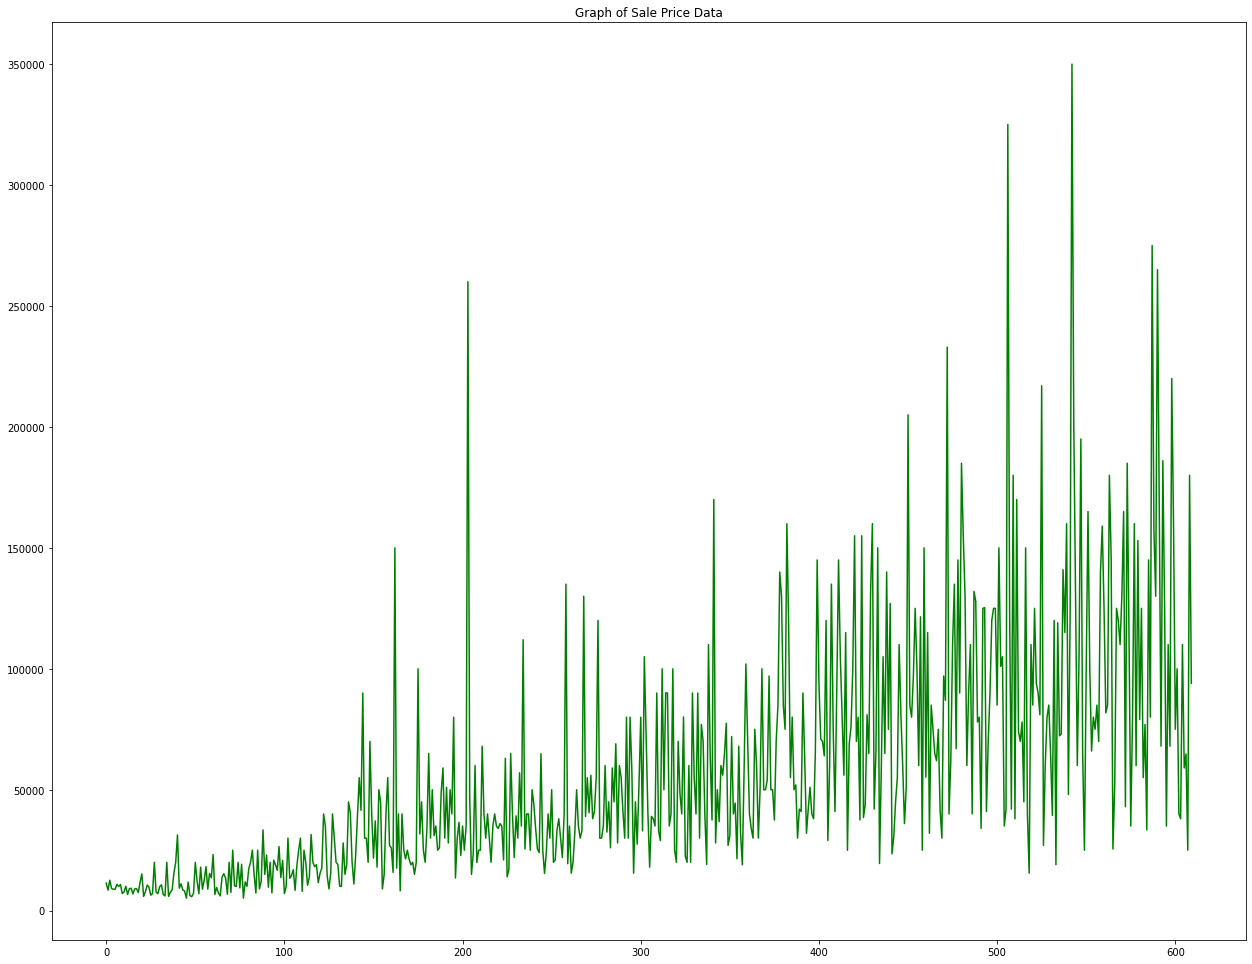

In [9]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [17.50, 13.50]
plt.rcParams["figure.autolayout"] = True

prices_index = np.array(list(range(prices.size)))

plt.title("Graph of Sale Price Data")
plt.plot(prices_index, prices, color="green")

plt.show()

In [10]:
quartile_0 = min(prices) 
quartile_1 = np.quantile(prices, .25)
quartile_2 = np.quantile(prices, .50)
quartile_3 = np.quantile(prices, .75)
quartile_4 = max(prices)
print(quartile_0, quartile_1, quartile_2, quartile_3, quartile_4)

5200 20925.0 40000.0 80000.0 350000


In [11]:
Sales_price_category = []
for price in prices:
  if price < quartile_1:
    Sales_price_category.append(float(0))
  elif price < quartile_2:
    Sales_price_category.append(float(1))
  elif price < quartile_3:
    Sales_price_category.append(float(2))
  else:
    Sales_price_category.append(float(3))
Sales_price_category[-10:]

[2.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 3.0, 3.0]

In [12]:
df['Sales Price Category'] = Sales_price_category
df.drop(columns=['Sale Price'], inplace=True)
df[-10:]

,Address,Postal Code,Attorney,Seller,Buyer,Water,PGW,Avg Walk&Transit score,Violent Crime Rate,School Score,Rent Estimate,taxAssessment,yearBuilt,SqFt,bathrooms,bedrooms,PropType,Average comps,Sales Price Category
605,"6336 HEGERMAN ST , Philadelphia, PA 19135",19135.0,UDREN LAW OFFICES P.C.,NEWLANDS ASSET HOLDING TRUST,UDREN LAW OFFICES P.C.,2997.64,1339.18,70.00,0.52,21.53,975,"82,400.00",1950.0,992.0,1,2,Townhouse,"75,117.89",2.0
606,"5306 TABOR AVE , Philadelphia, PA 19120",19120.0,THE LAW OFFICE OF GREGORY JAVARDIAN,THE BANK OF NEW YORK MELLON F/K/A THE BANK OF ...,THE LAW OFFICE OF GREGORY JAVARDIAN,4457.68,29.45,79.88,0.50,10.94,"1,150.00","106,100.00",1950.0,1188.0,2,3,Townhouse,"99,662.50",3.0
607,"115 N 55TH ST , Philadelphia, PA 19139",19139.0,HILL WALLACK LLP,TRIFERA LLC,HILL WALLACK LLP,692.75,115.49,80.08,1.54,3.34,"1,050.00","32,400.00",1920.0,1209.0,1,3,Condominium,"42,300.00",2.0
608,"1918 E SOMERSET ST , Philadelphia, PA 19134",19134.0,THE LAW OFFICE OF GREGORY JAVARDIAN,GREEN TREE SERVICING LLC,KAREN BREESE,671.16,0.00,71.25,0.97,11.05,"1,000.00","29,400.00",1910.0,984.0,1,3,Townhouse,"29,666.67",1.0
609,"2514 TULIP ST , Philadelphia, PA 19125",19125.0,PHELAN HALLINAN LLP,WELLS FARGO BANK N.A. AS TRUSTEE FOR SOUNDVIE...,PHELAN HALLINAN LLP,3043.45,1296.82,82.25,1.13,15.87,"1,350.00","74,700.00",1875.0,1120.0,2,3,Condominium,"117,708.33",3.0
610,"2210 N 17TH ST , Philadelphia, PA 19132",19132.0,SHAPIRO & DENARDO LLC,DEUTSCHE BANK NATIONAL TRUST COMPANY AS TRUST...,MORTGAGE INVESTMENTS LLC,1274.85,556.48,75.50,1.72,5.63,"1,250.00","13,400.00",1936.0,2288.0,1,5,Townhouse,"72,625.00",2.0
611,"31 N RUBY ST , Philadelphia, PA 19139",19139.0,MILSTEAD & ASSOCIATES LLC,FEDERAL NATIONAL MORTGAGE ASSOCIATION,MILSTEAD & ASSOCIATES LLC,53187.97,4930.07,80.08,1.54,3.34,"1,100.00","43,900.00",1925.0,1238.0,1,3,Townhouse,"56,029.00",2.0
612,"653 N 33RD ST , Philadelphia, PA 19104",19104.0,MCCABE WEISBERG & CONWAY P.C.,THE BANK OF NEW YORK MELLON FKA THE BANK OF NE...,THE BANK OF NEW YORK MELLON FKA THE BANK OF NE...,1823.79,379.75,81.79,0.65,28.40,"1,300.00","16,200.00",1935.0,2315.0,4,5,MultiFamily2To4,"21,166.67",1.0
613,"5423 WOODBINE AVE , Philadelphia, PA 19131",19131.0,STERN & EISENBERG P.C.,THE BANK OF NEW YORK MELLON F/K/A THE BANK OF ...,STERN & EISENBERG P.C.,1937.32,7101.25,65.75,0.29,8.34,"1,450.00","65,700.00",1925.0,3096.0,2,6,SingleFamily,"126,401.60",3.0
804,"730 S CECIL ST , Philadelphia, PA 19143",19143.0,POWERS KIRN & ASSOCIATES LLC,U.S. BANK NATIONAL ASSOCIATION AS TRUSTEE LEH...,POWERS KIRN & ASSOCIATES LLC,510.94,2113.99,79.00,0.80,5.07,"1,000.00","50,700.00",1920.0,900.0,1,3,Townhouse,"38,900.00",3.0


## Pre process data for the Nerual Network

In [13]:
df.drop(columns=['Address', 'Attorney', 'Seller', 'Buyer'], inplace=True)

In [14]:
PropType = df['PropType']
prop_types = set()
for prop in PropType:
  prop_types.add(prop)
prop_types = list(prop_types)
new_prop = list()
for prop in PropType:
  new_prop.append(float(prop_types.index(prop)))
df['PropType'] = new_prop

In [15]:
df = df[df[' bathrooms '] != ' -   ']
df['bathrooms'] = df[' bathrooms ']
df.drop(columns=[' bathrooms '], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
df = df[df[' bedrooms '] != ' -   ']
df['bedrooms'] = df[' bedrooms ']
df.drop(columns=[' bedrooms '], inplace=True)

In [17]:
df = df[df[' Avg Walk&Transit score  '] != ' -   ']
df['Avg Walk&Transit score'] = df[' Avg Walk&Transit score  ']
df.drop(columns=[' Avg Walk&Transit score  '], inplace=True)

In [18]:
df = df[df[' Violent Crime Rate '] != ' -   ']
df['Violent Crime Rate'] = df[' Violent Crime Rate ']
df.drop(columns=[' Violent Crime Rate '], inplace=True)

In [19]:
df = df[df[' School Score  '] != ' -   ']
df['School Score'] = df[' School Score  ']
df.drop(columns=[' School Score  '], inplace=True)

In [20]:
df = df.astype({'bathrooms': float, 'bedrooms': float})

In [ ]:
# PropType = df['Sale Date']
# prop_types = set()
# for prop in PropType:
#   prop_types.add(prop)
# prop_types
# df.columns


In [21]:
for column_name in ['Rent Estimate', 'taxAssessment', 'Average comps']:
  new_col = list()
  for cell in df[column_name]:
    new_col.append(float(cell.replace(',', '')))
  df[column_name] = new_col

In [22]:
df.dtypes

Postal Code               float64
Water                     float64
PGW                       float64
Rent Estimate             float64
taxAssessment             float64
yearBuilt                 float64
SqFt                      float64
PropType                  float64
Average comps             float64
Sales Price Category      float64
bathrooms                 float64
bedrooms                  float64
Avg Walk&Transit score    float64
Violent Crime Rate        float64
School Score              float64
dtype: object

In [23]:
df.head(2)

,Postal Code,Water,PGW,Rent Estimate,taxAssessment,yearBuilt,SqFt,PropType,Average comps,Sales Price Category,bathrooms,bedrooms,Avg Walk&Transit score,Violent Crime Rate,School Score
0,19125.0,361.49,415.28,1500.0,174000.0,1921.0,898.0,1.0,240254.55,0.0,1.0,2.0,82.25,1.13,15.87
1,19136.0,323.76,0.00,1200.0,119700.0,1959.0,1120.0,0.0,150937.50,0.0,1.5,3.0,65.25,0.35,32.53


In [24]:
df = df.sample(frac = 1)
train_samples = df[:500].drop(columns=['Sales Price Category'])
train_labels = df[:500]['Sales Price Category']
test_samples = df[500:].drop(columns=['Sales Price Category'])
test_labels = df[500:]['Sales Price Category']

In [25]:
train_samples

,Postal Code,Water,PGW,Rent Estimate,taxAssessment,yearBuilt,SqFt,PropType,Average comps,bathrooms,bedrooms,Avg Walk&Transit score,Violent Crime Rate,School Score
555,19104.0,3933.16,2054.28,1250.0,100000.0,1925.0,890.0,0.0,132850.00,1.0,3.0,81.79,0.65,28.40
269,19143.0,417.28,5837.92,1100.0,67000.0,1925.0,1280.0,2.0,75782.00,1.0,3.0,79.00,0.80,5.07
42,19142.0,368.41,0.00,1100.0,65400.0,1920.0,784.0,1.0,73898.80,1.0,3.0,76.50,0.84,7.28
494,19134.0,1710.32,600.70,1200.0,80300.0,1925.0,900.0,0.0,145258.33,1.0,2.0,71.25,0.97,11.05
454,19124.0,0.00,1216.38,1195.0,82600.0,1940.0,1240.0,0.0,72409.09,1.0,4.0,71.83,0.84,10.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,19134.0,2080.59,1646.60,1200.0,115100.0,1925.0,1290.0,1.0,137818.18,2.0,3.0,71.25,0.97,11.05
475,19145.0,166.47,17.93,1200.0,136400.0,1920.0,940.0,1.0,172707.69,1.0,2.0,67.50,0.46,14.20
599,19146.0,4745.53,3603.57,1250.0,103300.0,1923.0,1092.0,2.0,144685.05,1.0,3.0,90.00,0.36,17.28
231,19144.0,229.42,516.85,1350.0,150200.0,1900.0,1400.0,1.0,175325.00,1.0,3.0,71.75,0.86,7.89


In [26]:
train_samples = train_samples.to_numpy()
train_labels = train_labels.to_numpy()
test_samples = test_samples.to_numpy()
test_labels = test_labels.to_numpy()

In [27]:
train_samples.dtype

dtype('float64')

## Building the neural network model

In [28]:
model = None

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [30]:
model = Sequential([
    Dense(units=16, input_shape=(14,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=4, activation='softmax')
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 916
Trainable params: 916
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [33]:
model.fit(x=train_samples,
          y=train_labels, validation_split=0.1,
          batch_size=10,
          epochs=200,
          shuffle=True,
          verbose=2
)

Epoch 1/200
45/45 - 1s - loss: 25657.0195 - accuracy: 0.2556 - val_loss: 29004.4121 - val_accuracy: 0.1000 - 1s/epoch - 24ms/step
Epoch 2/200
45/45 - 0s - loss: 18880.9062 - accuracy: 0.2578 - val_loss: 20298.0859 - val_accuracy: 0.1200 - 96ms/epoch - 2ms/step
Epoch 3/200
45/45 - 0s - loss: 12773.9805 - accuracy: 0.2711 - val_loss: 12985.3936 - val_accuracy: 0.1200 - 94ms/epoch - 2ms/step
Epoch 4/200
45/45 - 0s - loss: 8165.8159 - accuracy: 0.2556 - val_loss: 7362.4336 - val_accuracy: 0.1600 - 94ms/epoch - 2ms/step
Epoch 5/200
45/45 - 0s - loss: 5212.2202 - accuracy: 0.2267 - val_loss: 4317.7046 - val_accuracy: 0.1400 - 75ms/epoch - 2ms/step
Epoch 6/200
45/45 - 0s - loss: 3720.3130 - accuracy: 0.2133 - val_loss: 2919.3262 - val_accuracy: 0.1400 - 92ms/epoch - 2ms/step
Epoch 7/200
45/45 - 0s - loss: 2960.4321 - accuracy: 0.1889 - val_loss: 2224.2693 - val_accuracy: 0.1800 - 71ms/epoch - 2ms/step
Epoch 8/200
45/45 - 0s - loss: 2368.1602 - accuracy: 0.2000 - val_loss: 1753.0950 - val_accu

In [34]:
predictions = model.predict(x=test_samples, batch_size=10, verbose=1) 

8/8 [==============================] - 0s 2ms/step


In [35]:
for i in predictions:
    print(i)

[4.304145e-32 0.000000e+00 1.000000e+00 8.405773e-13]
[6.7314539e-16 4.4328936e-21 1.0000000e+00 1.7522679e-27]
[1.6069456e-05 1.7192811e-25 9.9998391e-01 6.5966651e-32]
[0.0000000e+00 0.0000000e+00 1.3221258e-20 1.0000000e+00]
[5.6281547e-18 9.6440574e-23 1.0000000e+00 3.8897891e-33]
[0. 0. 1. 0.]
[0.0000000e+00 0.0000000e+00 6.2477284e-38 1.0000000e+00]
[1.7177718e-13 1.0000529e-16 1.0000000e+00 1.7216871e-37]
[1.0000000e+00 1.3106645e-08 4.6700851e-12 0.0000000e+00]
[0.01671488 0.25835547 0.7249297  0.        ]
[3.6184067e-01 7.4341580e-07 6.3815856e-01 0.0000000e+00]
[8.8408750e-38 0.0000000e+00 1.0000000e+00 1.3164349e-26]
[1.2283696e-09 2.1882023e-09 1.0000000e+00 0.0000000e+00]
[1.5345468e-13 2.4834940e-18 1.0000000e+00 8.4323625e-36]
[6.215614e-30 0.000000e+00 1.000000e+00 4.929986e-09]
[5.4330687e-09 1.7479731e-14 1.0000000e+00 7.4933933e-32]
[0.0000000e+00 0.0000000e+00 1.7085013e-10 1.0000000e+00]
[0.000000e+00 2.638577e-26 1.000000e+00 0.000000e+00]
[1.8162484e-19 2.1455551

In [36]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
for i in rounded_predictions:
    print(i)

# Confusion Matrix

In [38]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [39]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 7  1 12  0]
 [ 5  0 16  0]
 [ 1  0 22  0]
 [ 0  0  5  6]]


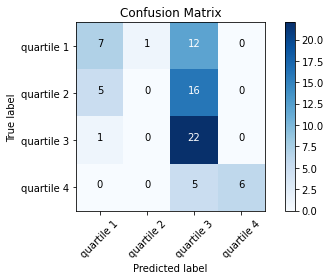

In [42]:
cm_plot_labels = ['quartile 1','quartile 2', 'quartile 3', 'quartile 4']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')